In [95]:
import pandas as pd
import numpy as np

# Ruta al archivo CSV original
input_file_path = 'FORM.csv'

# Leer el archivo CSV
df = pd.read_csv(input_file_path)

# Eliminar la columna de marca temporal (generalmente la primera columna)
df = df.iloc[:, 1:]

# Si deseas eliminar otra columna específica por nombre (como la primera columna después de eliminar la marca temporal)
# df = df.drop(columns=df.columns[0])

# Convertir el DataFrame a un array de NumPy
data_array = df.to_numpy()

# Mostrar el array de NumPy
print("Array de NumPy:")
print(data_array.shape)

Array de NumPy:
(13, 121)


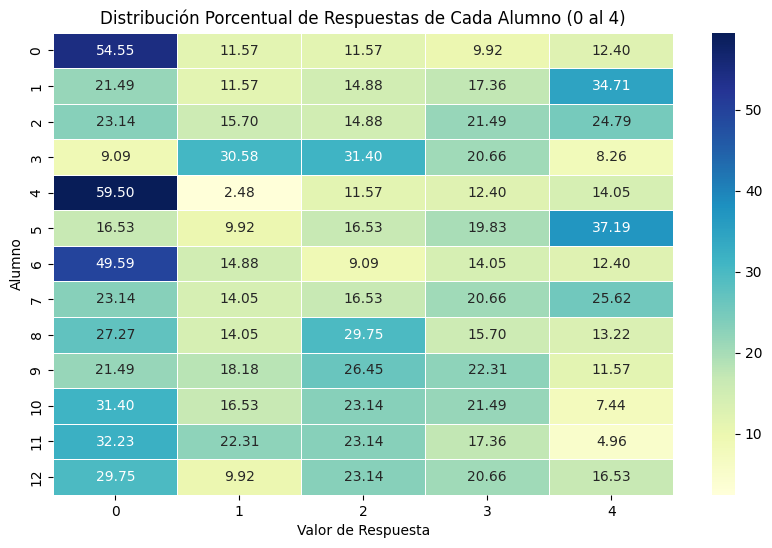

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suponiendo que 'data_array' ya está cargada con tus datos
# Crear un DataFrame para almacenar los resultados porcentuales
resultados_distribucion = pd.DataFrame(columns=[0, 1, 2, 3, 4])

# Iterar sobre cada fila (alumno) y calcular la frecuencia de cada valor en porcentaje
for i in range(data_array.shape[0]):
    distribucion = pd.Series(data_array[i]).value_counts(normalize=True).reindex([0, 1, 2, 3, 4], fill_value=0)
    resultados_distribucion.loc[i] = distribucion * 100  # Convertir a porcentaje

# Visualización de la distribución de respuestas en porcentajes
plt.figure(figsize=(10, 6))
sns.heatmap(resultados_distribucion, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5, fmt=".2f")
plt.title('Distribución Porcentual de Respuestas de Cada Alumno (0 al 4)')
plt.xlabel('Valor de Respuesta')
plt.ylabel('Alumno')
plt.savefig('DistribucionPorcentual.png')  
plt.show()


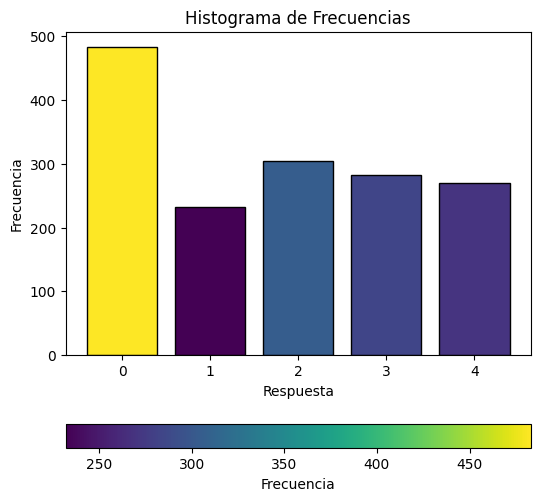

In [109]:
import numpy as np
import matplotlib.pyplot as plt


# Convertir la matriz en un array plano
responses = data_matrix.flatten()

# Calcular la frecuencia de cada respuesta
frequencies, bins = np.histogram(responses, bins=np.arange(6) - 0.5)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(6, 6))

# Crear un mapa de colores
cmap = plt.get_cmap('viridis')

# Normalizar las frecuencias para el mapa de colores
norm = plt.Normalize(frequencies.min(), frequencies.max())

# Crear una barra de colores que representa las frecuencias
bar = ax.bar(np.arange(len(frequencies)), frequencies, color=cmap(norm(frequencies)), edgecolor='black')

# Añadir una barra de color
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
cbar.set_label('Frecuencia')

# Configurar etiquetas y título
ax.set_xlabel('Respuesta')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Frecuencias')

# Configurar los ticks en el eje X
ax.set_xticks(np.arange(len(frequencies)))
ax.set_xticklabels(['0', '1', '2', '3', '4'])

plt.savefig('Histograma.png')  
plt.show()


In [98]:
# Calcular la media de cada columna
mean_per_column = np.mean(data_array, axis=0)

# Mostrar la media de cada columna
print("Media de cada columna:")
print(mean_per_column)

Media de cada columna:
[0.         2.23076923 3.46153846 2.46153846 2.76923077 3.46153846
 2.         0.84615385 1.07692308 1.53846154 0.46153846 2.46153846
 0.         3.         3.07692308 2.84615385 2.69230769 1.76923077
 2.84615385 2.69230769 2.30769231 2.         3.07692308 1.84615385
 0.         3.53846154 2.30769231 3.23076923 1.38461538 1.23076923
 1.46153846 2.30769231 0.38461538 2.53846154 2.23076923 1.61538462
 0.         2.23076923 2.46153846 1.76923077 1.69230769 2.84615385
 2.38461538 1.76923077 2.38461538 1.76923077 2.15384615 2.30769231
 0.         3.30769231 1.69230769 1.46153846 2.46153846 2.15384615
 0.84615385 2.92307692 1.46153846 1.84615385 2.07692308 1.76923077
 0.         1.23076923 0.69230769 1.46153846 1.15384615 0.38461538
 2.53846154 1.69230769 1.92307692 2.61538462 2.30769231 2.23076923
 0.         1.38461538 2.23076923 1.38461538 1.46153846 2.07692308
 3.07692308 2.46153846 2.84615385 2.15384615 2.23076923 2.69230769
 0.         2.30769231 1.61538462 2.307

In [99]:
# Redondear hacia el entero más cercano
rounded_mean_per_column = np.round(mean_per_column).astype(int)

# Mostrar la media redondeada de cada columna
print("Media redondeada de cada columna (hacia el entero más cercano):")
print(rounded_mean_per_column)

Media redondeada de cada columna (hacia el entero más cercano):
[0 2 3 2 3 3 2 1 1 2 0 2 0 3 3 3 3 2 3 3 2 2 3 2 0 4 2 3 1 1 1 2 0 3 2 2 0
 2 2 2 2 3 2 2 2 2 2 2 0 3 2 1 2 2 1 3 1 2 2 2 0 1 1 1 1 0 3 2 2 3 2 2 0 1
 2 1 1 2 3 2 3 2 2 3 0 2 2 2 1 2 2 2 2 2 2 2 0 1 2 2 1 2 2 2 1 2 1 1 0 0 1
 1 1 2 2 1 1 2 1 0 0]


In [100]:
array = rounded_mean_per_column

# Definir el número de columnas
num_columns = 11

# Crear la matriz
num_rows = len(array) // num_columns
matrix = array.reshape((num_rows, num_columns))

print("Matriz resultante:")
print(matrix)


Matriz resultante:
[[0 2 3 2 3 3 2 1 1 2 0]
 [2 0 3 3 3 3 2 3 3 2 2]
 [3 2 0 4 2 3 1 1 1 2 0]
 [3 2 2 0 2 2 2 2 3 2 2]
 [2 2 2 2 0 3 2 1 2 2 1]
 [3 1 2 2 2 0 1 1 1 1 0]
 [3 2 2 3 2 2 0 1 2 1 1]
 [2 3 2 3 2 2 3 0 2 2 2]
 [1 2 2 2 2 2 2 2 0 1 2]
 [2 1 2 2 2 1 2 1 1 0 0]
 [1 1 1 2 2 1 1 2 1 0 0]]


In [101]:
matrix.shape

(11, 11)

In [102]:
suma_filas = np.sum(matrix, axis=1)
print("Suma de cada fila:", suma_filas)


Suma de cada fila: [19 26 19 22 19 14 19 23 18 14 12]


In [103]:
suma_columnas = np.sum(matrix, axis=0)
print("Suma de cada columna:", suma_columnas)

Suma de cada columna: [22 18 21 25 22 22 18 15 17 15 10]


In [104]:
Time_suma = suma_columnas * suma_filas
print("Producto de las sumas", Time_suma)

Producto de las sumas [418 468 399 550 418 308 342 345 306 210 120]


In [105]:
# Encontrar el elemento máximo
max_element_filas = np.max(suma_filas)

# Dividir cada elemento entre el máximo
normalized_array_filas = suma_filas / max_element_filas

print(normalized_array_filas)

[0.73076923 1.         0.73076923 0.84615385 0.73076923 0.53846154
 0.73076923 0.88461538 0.69230769 0.53846154 0.46153846]


In [106]:
# Encontrar el elemento máximo
max_element_columnas = np.max(suma_columnas)

# Dividir cada elemento entre el máximo
normalized_array_columnas = suma_columnas / max_element_columnas

print(normalized_array_columnas)

[0.88 0.72 0.84 1.   0.88 0.88 0.72 0.6  0.68 0.6  0.4 ]


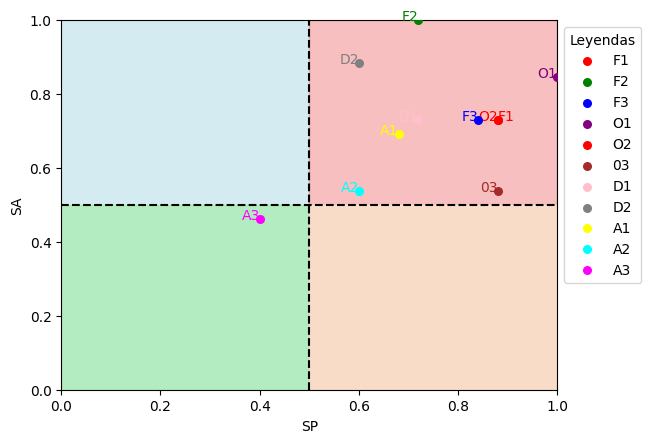

In [107]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['F1','F2', 'F3', 'O1', 'O2', '03', 'D1', 'D2', 'A1', 'A2', 'A3']

# Crear una lista de colores para los puntos
colors = ['red', 'green', 'blue', 'purple', 'red', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta']

# Crear una figura y un eje
fig, ax = plt.subplots()

# Definir los límites del gráfico
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Crear cuadrantes con diferentes colores
# Cuadrante 1 (arriba a la derecha)
ax.fill_betweenx([0, 1], 0, 0.5, color='lightblue', alpha=0.5)
ax.fill_between([0, 0.5], 0, 0.5, color='lightgreen', alpha=0.5)

# Cuadrante 2 (arriba a la izquierda)
ax.fill_betweenx([0, 1], 0.5, 1, color='lightcoral', alpha=0.5)
ax.fill_between([0.5, 1], 0, 0.5, color='lightgoldenrodyellow', alpha=0.5)

# Añadir líneas divisorias
ax.plot([0.5, 0.5], [0, 1], color='black', linestyle='--')
ax.plot([0, 1], [0.5, 0.5], color='black', linestyle='--')

# Añadir los puntos al gráfico con diferentes colores y tamaño reducido, y etiquetar cada punto
for i, label in enumerate(labels):
    ax.scatter(normalized_array_columnas[i], normalized_array_filas[i], color=colors[i], s=30, label=label, zorder=5)

# Etiquetar los puntos
for i, label in enumerate(labels):
    if i == 0:
        ax.text(normalized_array_columnas[i], normalized_array_filas[i], label, fontsize=10, ha='left', color=colors[i])
    else: 
        ax.text(normalized_array_columnas[i], normalized_array_filas[i], label, fontsize=10, ha='right', color=colors[i])

# Añadir leyenda
#ax.legend(loc='upper left', fontsize=8, title="Leyendas")
ax.legend(loc='upper left', title="Leyendas", bbox_to_anchor=(1, 1))

# Etiquetas y título
ax.set_xlabel('SP')
ax.set_ylabel('SA')

# Mostrar el gráfico
plt.savefig('SP_PA.png')  
plt.show()
